### Building an image classification model using very little data  

Based on the tutorial by Francois Chollet @fchollet https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html and the workbook by Guillaume Dominici https://github.com/gggdominici/keras-workshop

This tutorial presents several ways to build an image classifier using keras from just a few hundred or thousand pictures from each class you want to be able to recognize.

We will go over the following options:  

- training a small network from scratch (as a baseline)  
- using the bottleneck features of a pre-trained network  
- fine-tuning the top layers of a pre-trained network  
  
This will lead us to cover the following Keras features:   
  
- fit_generator for training Keras a model using Python data generators  
- ImageDataGenerator for real-time data augmentation  
- layer freezing and model fine-tuning  
- ...and more.  


## Data

Data can be downloaded at:
https://www.kaggle.com/c/dogs-vs-cats/data  
All you need is the train set  
The recommended folder structure is:  

### Folder structure

```python
data/
    train/
        dogs/ ### 1024 pictures
            dog001.jpg
            dog002.jpg
            ...
        cats/ ### 1024 pictures
            cat001.jpg
            cat002.jpg
            ...
    validation/
        dogs/ ### 416 pictures
            dog001.jpg
            dog002.jpg
            ...
        cats/ ### 416 pictures
            cat001.jpg
            cat002.jpg
            ...
```
Note : for this example we only consider 2x1000 training images and 2x400 testing images among the 2x12500 available.

The github repo includes about 1500 images for this model. The original Kaggle dataset is much larger. The purpose of this demo is to show how you can build models with smaller size datasets. You should be able to improve this model by using more data.

In [104]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras import models
from keras import layers

# path to the model weights files.
#weights_path = '../keras/examples/vgg16_weights.h5'
#top_model_weights_path = 'bottleneck_fc_model.h5'
# dimensions of our images.
img_width, img_height = 320, 240

train_data_dir = 'data11/train'
validation_data_dir = 'data11/validation'

batch_size = 32


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(240, 320, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.001, momentum=0.9),
              metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    channel_shift_range=20,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    #fill_mode='nearest')
)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary')

Found 2244 images belonging to 2 classes.
Found 2244 images belonging to 2 classes.


In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 238, 318, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 119, 159, 32)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 117, 157, 64)      18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 58, 78, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 56, 76, 128)       73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 28, 38, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 26, 36, 128)       147584    
__________

In [12]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [26]:
train_data_dir = 'data6/train'
validation_data_dir = 'data6/validation'


# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    #shear_range=0.2,
    zoom_range=0.1,
    #horizontal_flip=True,
    #fill_mode='nearest')
)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 6848 images belonging to 3 classes.
Found 1727 images belonging to 3 classes.


In [13]:
model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/10
100/100 [==============================] - 61s - loss: 1.2467 - acc: 0.3990 - val_loss: 0.7855 - val_acc: 0.7415
Epoch 2/10
100/100 [==============================] - 51s - loss: 0.8748 - acc: 0.6121 - val_loss: 0.9951 - val_acc: 0.5835
Epoch 3/10
100/100 [==============================] - 51s - loss: 0.7013 - acc: 0.7003 - val_loss: 0.6799 - val_acc: 0.7035
Epoch 4/10
100/100 [==============================] - 51s - loss: 0.6041 - acc: 0.7540 - val_loss: 0.7490 - val_acc: 0.7315
Epoch 5/10
100/100 [==============================] - 51s - loss: 0.5058 - acc: 0.8019 - val_loss: 0.5792 - val_acc: 0.7842
Epoch 6/10
100/100 [==============================] - 51s - loss: 0.4425 - acc: 0.8245 - val_loss: 0.3975 - val_acc: 0.8427
Epoch 7/10
100/100 [==============================] - 51s - loss: 0.3897 - acc: 0.8484 - val_loss: 0.5556 - val_acc: 0.8010
Epoch 8/10
100/100 [==============================] - 51s - loss: 0.3516 - acc: 0.8592 - val_loss: 0.3196 - val_acc: 0.8835
Epoch 9/

In [76]:
model.save_weights('Simple_model_data9_1.h5')

## Using feature extraction

In [2]:
from keras.applications import VGG16
img_width, img_height = 320, 240

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_height, img_width, 3))

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'data3'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 10, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 4000)
validation_features, validation_labels = extract_features(validation_dir, 980)
#test_features, test_labels = extract_features(test_dir, 1000)
# The extracted features are currently of shape (samples, 7, 10, 512)
# We will feed them to a densely-connected classifier, so first we must flatten them to (samples, 35840):
train_features = np.reshape(train_features, (4000, 7 * 10 * 512))
validation_features = np.reshape(validation_features, (980, 7 * 10 * 512))
#test_features = np.reshape(test_features, (1000, 7 * 10 * 512))

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7 * 10 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=20,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))


Found 4374 images belonging to 3 classes.
Found 1070 images belonging to 3 classes.


KeyboardInterrupt: 

In [222]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 240, 320, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 240, 320, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 240, 320, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 120, 160, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 120, 160, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 120, 160, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 60, 80, 128)       0         
__________

## Using augmentation

In [13]:
from keras import models
from keras import layers
from keras.applications import VGG16
from keras import optimizers
import os

img_height, img_width = 240, 320

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_height, img_width, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))



base_dir = 'data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')




print('This is the number of trainable weights '
         'before freezing the conv base: ', len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights '
          'after freezing the conv base: ', len(model.trainable_weights))

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1. / 255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_height, img_width),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_height, img_width),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)


('This is the number of trainable weights before freezing the conv base: ', 30)
('This is the number of trainable weights after freezing the conv base: ', 4)
Found 2048 images belonging to 2 classes.
Found 832 images belonging to 2 classes.
Epoch 1/5
100/100 [==============================] - 112s - loss: 0.9413 - acc: 0.5095 - val_loss: 0.9490 - val_acc: 0.5020
Epoch 2/5
100/100 [==============================] - 114s - loss: 0.7026 - acc: 0.5420 - val_loss: 0.9182 - val_acc: 0.4940
Epoch 3/5
100/100 [==============================] - 114s - loss: 0.7160 - acc: 0.5485 - val_loss: 1.0534 - val_acc: 0.5081
Epoch 4/5
100/100 [==============================] - 115s - loss: 0.6976 - acc: 0.5812 - val_loss: 1.5854 - val_acc: 0.4990
Epoch 5/5
100/100 [==============================] - 115s - loss: 0.6955 - acc: 0.5257 - val_loss: 0.7663 - val_acc: 0.5000


In [6]:
model.load_weights('Feature-extract-daiwa-1.h5')

ValueError: Cannot feed value of shape (3, 3, 512, 512) for Tensor u'Placeholder_52:0', which has shape '(3, 3, 3, 64)'

## Fine-tuning the top layers of a a pre-trained network

### Note that:

* in order to perform fine-tuning, all layers should start with properly trained weights: for instance you should not slap a randomly initialized fully-connected network on top of a pre-trained convolutional base. This is because the large gradient updates triggered by the randomly initialized weights would wreck the learned weights in the convolutional base. In our case this is why we first train the top-level classifier, and only then start fine-tuning convolutional weights alongside it.
* we choose to only fine-tune the last convolutional block rather than the entire network in order to prevent overfitting, since the entire network would have a very large entropic capacity and thus a strong tendency to overfit. The features learned by low-level convolutional blocks are more general, less abstract than those found higher-up, so it is sensible to keep the first few blocks fixed (more general features) and only fine-tune the last one (more specialized features). 
* fine-tuning should be done with a very slow learning rate, and typically with the SGD optimizer rather than an adaptative learning rate optimizer such as RMSProp. This is to make sure that the magnitude of the updates stays very small, so as not to wreck the previously learned features. <br/>

In [1]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras import models
from keras import layers

# path to the model weights files.
#weights_path = '../keras/examples/vgg16_weights.h5'
#top_model_weights_path = 'bottleneck_fc_model.h5'
# dimensions of our images.
img_width, img_height = 320, 240
batch_size = 32

train_data_dir = 'data10_1/train'
validation_data_dir = 'data10_1/validation'


# build the VGG16 network
conv_base = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block3_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
#top_model = Sequential()
#top_model.add(Flatten(input_shape=conv_base.output_shape[1:]))
#top_model.add(Dense(256, activation='relu'))
#top_model.add(Dropout(0.5))
#top_model.add(Dense(1, activation='sigmoid'))


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(4, activation='sigmoid'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
#top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
# model.add(top_model) # Their approach would work if we weren't trying to reload the top model weights from part 2 of the tutorial

# model = Model(input= base_model.input, output= top_model(base_model.output))

# set the first 15 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
#for layer in model.layers[:15]:
    #layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    channel_shift_range=20,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
    #fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Using TensorFlow backend.


Model loaded.
Found 1496 images belonging to 4 classes.
Found 1496 images belonging to 4 classes.


In [1]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras import models
from keras import layers

# path to the model weights files.
#weights_path = '../keras/examples/vgg16_weights.h5'
#top_model_weights_path = 'bottleneck_fc_model.h5'
# dimensions of our images.
img_width, img_height = 320, 240
batch_size = 32

train_data_dir = 'data7_3/train'
validation_data_dir = 'data7_3/validation'


# build the VGG16 network
conv_base = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block3_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
#top_model = Sequential()
#top_model.add(Flatten(input_shape=conv_base.output_shape[1:]))
#top_model.add(Dense(256, activation='relu'))
#top_model.add(Dropout(0.5))
#top_model.add(Dense(1, activation='sigmoid'))


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(3, activation='sigmoid'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
#top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
# model.add(top_model) # Their approach would work if we weren't trying to reload the top model weights from part 2 of the tutorial

# model = Model(input= base_model.input, output= top_model(base_model.output))

# set the first 15 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
#for layer in model.layers[:15]:
    #layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    channel_shift_range=30,
    #rotation_range=10,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    #shear_range=0.1,
    #zoom_range=0.1,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Using TensorFlow backend.


Model loaded.
Found 12585 images belonging to 3 classes.
Found 3868 images belonging to 3 classes.


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 10, 512)        14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 35840)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               9175296   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 23,890,755
Trainable params: 23,630,595
Non-trainable params: 260,160
_________________________________________________________________


In [3]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 124s - loss: 1.0197 - acc: 0.4850 - val_loss: 0.8072 - val_acc: 0.6713
Epoch 2/30
100/100 [==============================] - 119s - loss: 0.7889 - acc: 0.6491 - val_loss: 0.6130 - val_acc: 0.7438
Epoch 3/30
100/100 [==============================] - 120s - loss: 0.6590 - acc: 0.7000 - val_loss: 0.5223 - val_acc: 0.7845
Epoch 4/30
100/100 [==============================] - 120s - loss: 0.5483 - acc: 0.7578 - val_loss: 0.4394 - val_acc: 0.8269
Epoch 5/30
100/100 [==============================] - 119s - loss: 0.4796 - acc: 0.7887 - val_loss: 0.3394 - val_acc: 0.8853
Epoch 6/30
100/100 [==============================] - 119s - loss: 0.3838 - acc: 0.8391 - val_loss: 0.3148 - val_acc: 0.8725
Epoch 7/30
100/100 [==============================] - 119s - loss: 0.3430 - acc: 0.8519 - val_loss: 0.4306 - val_acc: 0.8001
Epoch 8/30
100/100 [==============================] - 118s - loss: 0.3234 - acc: 0.8623 - val_loss: 0.2682 - val_acc: 0.8650


In [4]:
model.save_weights('Fine-tuning-daiwa-30-conv3-data7_3.h5') # may overfitting

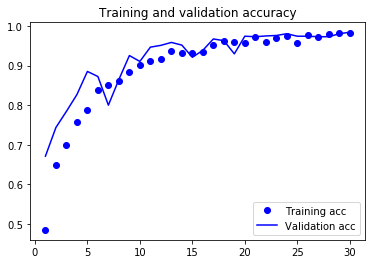

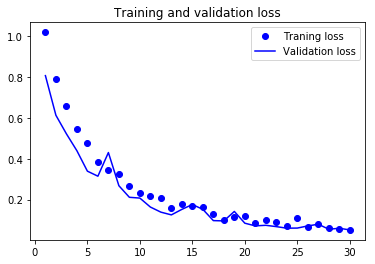

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Traning loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Here are a few more approaches you can try to get to above 0.95:

* more aggresive data augmentation
* more aggressive dropout
* use of L1 and L2 regularization (also known as "weight decay")
* fine-tuning one more convolutional block (alongside greater regularization)

In [6]:
from keras import applications
from keras import optimizers
from keras.layers import Dropout
from keras import models
from keras import layers


img_width, img_height = 320, 240
conv_base = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(4, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),metrics=['accuracy'])

# load weights
model.load_weights('Fine-tuning-daiwa-100-conv5-4labels.h5')
print('Model loaded.')

IOError: Unable to open file (Unable to open file: name = 'fine-tuning-daiwa-100-conv5-4labels.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
img = cv2.imread('1.jpg', size=(240, 320))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
model.predict(img)

In [ ]:
cv2.imread('test2.jpg')

In [95]:
scipy.misc.imresize(scipy.misc.imread('test2.jpg'),size = (256, 256)) 

array([[[128, 139, 122],
        [127, 138, 121],
        [128, 139, 122],
        ..., 
        [120, 133, 107],
        [119, 131, 107],
        [123, 135, 111]],

       [[122, 133, 116],
        [123, 134, 117],
        [125, 136, 119],
        ..., 
        [121, 134, 108],
        [120, 132, 108],
        [125, 137, 113]],

       [[118, 129, 112],
        [119, 130, 113],
        [123, 134, 117],
        ..., 
        [118, 130, 106],
        [118, 130, 108],
        [122, 134, 112]],

       ..., 
       [[241, 224, 194],
        [241, 224, 194],
        [240, 223, 193],
        ..., 
        [241, 247, 247],
        [234, 238, 239],
        [219, 223, 222]],

       [[238, 221, 191],
        [238, 221, 191],
        [239, 222, 192],
        ..., 
        [236, 245, 244],
        [236, 242, 242],
        [231, 237, 237]],

       [[237, 220, 190],
        [237, 220, 190],
        [237, 220, 190],
        ..., 
        [231, 240, 239],
        [232, 241, 240],
        [236, 242,

In [20]:
from keras.preprocessing import image
import numpy as np

img = image.load_img('7.JPG', target_size=(256, 256))
img_tensor = image.img_to_array(img)

In [21]:
img_tensor

array([[[ 128.,  139.,  122.],
        [ 127.,  138.,  121.],
        [ 128.,  139.,  122.],
        ..., 
        [ 120.,  133.,  107.],
        [ 119.,  131.,  107.],
        [ 123.,  135.,  111.]],

       [[ 122.,  133.,  116.],
        [ 123.,  134.,  117.],
        [ 125.,  136.,  119.],
        ..., 
        [ 121.,  134.,  108.],
        [ 120.,  132.,  108.],
        [ 125.,  137.,  113.]],

       [[ 118.,  129.,  112.],
        [ 119.,  130.,  113.],
        [ 123.,  134.,  117.],
        ..., 
        [ 118.,  130.,  106.],
        [ 118.,  130.,  108.],
        [ 122.,  134.,  112.]],

       ..., 
       [[ 241.,  224.,  194.],
        [ 241.,  224.,  194.],
        [ 240.,  223.,  193.],
        ..., 
        [ 241.,  247.,  247.],
        [ 234.,  238.,  239.],
        [ 219.,  223.,  222.]],

       [[ 238.,  221.,  191.],
        [ 238.,  221.,  191.],
        [ 239.,  222.,  192.],
        ..., 
        [ 236.,  245.,  244.],
        [ 236.,  242.,  242.],
        [ 

In [22]:
img_tensor = np.expand_dims(img_tensor, axis=0)

In [23]:
img_tensor

array([[[[ 128.,  139.,  122.],
         [ 127.,  138.,  121.],
         [ 128.,  139.,  122.],
         ..., 
         [ 120.,  133.,  107.],
         [ 119.,  131.,  107.],
         [ 123.,  135.,  111.]],

        [[ 122.,  133.,  116.],
         [ 123.,  134.,  117.],
         [ 125.,  136.,  119.],
         ..., 
         [ 121.,  134.,  108.],
         [ 120.,  132.,  108.],
         [ 125.,  137.,  113.]],

        [[ 118.,  129.,  112.],
         [ 119.,  130.,  113.],
         [ 123.,  134.,  117.],
         ..., 
         [ 118.,  130.,  106.],
         [ 118.,  130.,  108.],
         [ 122.,  134.,  112.]],

        ..., 
        [[ 241.,  224.,  194.],
         [ 241.,  224.,  194.],
         [ 240.,  223.,  193.],
         ..., 
         [ 241.,  247.,  247.],
         [ 234.,  238.,  239.],
         [ 219.,  223.,  222.]],

        [[ 238.,  221.,  191.],
         [ 238.,  221.,  191.],
         [ 239.,  222.,  192.],
         ..., 
         [ 236.,  245.,  244.],
       

In [24]:
img_tensor /= 255.

In [25]:
img_tensor

array([[[[ 0.50196081,  0.54509807,  0.47843137],
         [ 0.49803922,  0.5411765 ,  0.47450981],
         [ 0.50196081,  0.54509807,  0.47843137],
         ..., 
         [ 0.47058824,  0.52156866,  0.41960785],
         [ 0.46666667,  0.51372552,  0.41960785],
         [ 0.48235294,  0.52941179,  0.43529412]],

        [[ 0.47843137,  0.52156866,  0.45490196],
         [ 0.48235294,  0.52549022,  0.45882353],
         [ 0.49019608,  0.53333336,  0.46666667],
         ..., 
         [ 0.47450981,  0.52549022,  0.42352942],
         [ 0.47058824,  0.51764709,  0.42352942],
         [ 0.49019608,  0.53725493,  0.44313726]],

        [[ 0.4627451 ,  0.50588238,  0.43921569],
         [ 0.46666667,  0.50980395,  0.44313726],
         [ 0.48235294,  0.52549022,  0.45882353],
         ..., 
         [ 0.4627451 ,  0.50980395,  0.41568628],
         [ 0.4627451 ,  0.50980395,  0.42352942],
         [ 0.47843137,  0.52549022,  0.43921569]],

        ..., 
        [[ 0.94509804,  0.87843138,

In [26]:
img_tensor.shape

(1, 256, 256, 3)

In [33]:
import scipy
imgs = [np.transpose(scipy.misc.imresize(scipy.misc.imread('test2.jpg'), size = (256, 256)), (1, 0, 2)).astype('float32')]
imgs = np.array(imgs) / 255.0

In [34]:
imgs

array([[[[ 0.50196081,  0.54509807,  0.47843137],
         [ 0.47843137,  0.52156866,  0.45490196],
         [ 0.4627451 ,  0.50588238,  0.43921569],
         ..., 
         [ 0.94509804,  0.87843138,  0.76078433],
         [ 0.93333334,  0.86666667,  0.74901962],
         [ 0.92941177,  0.86274511,  0.74509805]],

        [[ 0.49803922,  0.5411765 ,  0.47450981],
         [ 0.48235294,  0.52549022,  0.45882353],
         [ 0.46666667,  0.50980395,  0.44313726],
         ..., 
         [ 0.94509804,  0.87843138,  0.76078433],
         [ 0.93333334,  0.86666667,  0.74901962],
         [ 0.92941177,  0.86274511,  0.74509805]],

        [[ 0.50196081,  0.54509807,  0.47843137],
         [ 0.49019608,  0.53333336,  0.46666667],
         [ 0.48235294,  0.52549022,  0.45882353],
         ..., 
         [ 0.94117647,  0.87450981,  0.75686276],
         [ 0.93725491,  0.87058824,  0.75294119],
         [ 0.92941177,  0.86274511,  0.74509805]],

        ..., 
        [[ 0.47058824,  0.52156866,

In [39]:
import scipy
imgs = [np.transpose(scipy.misc.imresize(scipy.misc.imread('14.JPG'), size = (320, 240)), (1, 0, 2)).astype('float32')]
imgs = np.array(imgs) / 255
print model.predict(imgs)

[[ 0.02041227]]


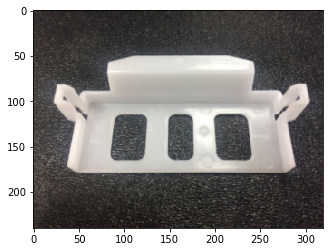

In [28]:
import scipy

plt.imshow(scipy.misc.imresize(scipy.misc.imread('13.JPG'), size = (240, 320)))

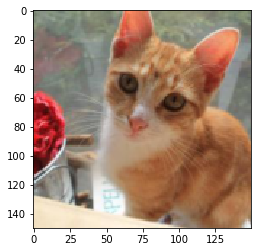

In [14]:
plt.imshow(scipy.misc.imresize(scipy.misc.imread('test2.jpg'), size = (150, 150)))

In [86]:
(scipy.misc.imread('test2.jpg')).shape

(256, 256, 3)

In [88]:
(scipy.misc.imresize(scipy.misc.imread('test2.jpg'), size = (150, 150))).shape

(150, 150, 3)

In [79]:
imgs = np.array(imgs) / 255.0

TypeError: Invalid dimensions for image data

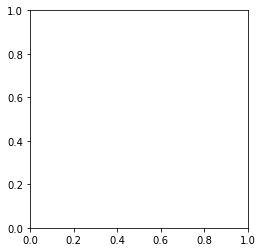

In [80]:
plt.imshow(imgs)

In [67]:
imgs

array([[[[ 0.49411765,  0.53725493,  0.47058824],
         [ 0.47058824,  0.51372552,  0.44705883],
         [ 0.47058824,  0.51372552,  0.44705883],
         ..., 
         [ 0.95686275,  0.89019608,  0.77254903],
         [ 0.94509804,  0.87843138,  0.76078433],
         [ 0.93333334,  0.86666667,  0.74901962]],

        [[ 0.49803922,  0.5411765 ,  0.47450981],
         [ 0.48235294,  0.52549022,  0.45882353],
         [ 0.4627451 ,  0.50588238,  0.43921569],
         ..., 
         [ 0.94901961,  0.88235295,  0.7647059 ],
         [ 0.94117647,  0.87450981,  0.75686276],
         [ 0.93333334,  0.86666667,  0.74901962]],

        [[ 0.51372552,  0.55686277,  0.49411765],
         [ 0.51372552,  0.55686277,  0.49019608],
         [ 0.48235294,  0.52549022,  0.45882353],
         ..., 
         [ 0.94509804,  0.87843138,  0.76078433],
         [ 0.94509804,  0.87843138,  0.76078433],
         [ 0.94117647,  0.87450981,  0.75686276]],

        ..., 
        [[ 0.51372552,  0.56470591,

In [45]:
import cv2
import numpy as np

img = cv2.imread('7.JPG')
img = cv2.resize(img, (240, 320)) 
img = img/255.0
img = np.reshape(img,[1,240,320,3])
classes = model.predict(img)
print classes

[[ 0.97602481]]


In [119]:
import cv2
img = cv2.imread('my_photo-9264.jpg', 0)
ret, thresh = cv2.threshold(img, 100, 255, cv2.THRESH_TOZERO)
median = cv2.medianBlur(thresh, 3)
cv2.imwrite('my_photo-9264-new.jpg', median)

True

In [92]:
import cv2
img = cv2.imread('thanh0.jpg', 0)
ret, thresh = cv2.threshold(img, 100, 255, cv2.THRESH_TOZERO)
median = cv2.medianBlur(thresh, 3)
cv2.imwrite('thanh0-new.jpg', median)
image = cv2.imread('my_photo-9245-new.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
print gray_image
cv2.imwrite('thanh0-new-gray.jpg',gray_image)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


True

In [97]:
import cv2
image = cv2.imread('thanh0.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print gray_image
cv2.imwrite('thanh0-new-gray.jpg',gray_image)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


True

In [6]:
from keras.preprocessing import image
import numpy as np
#img = image.load_img('thanh4.jpg', target_size=(240, 320))
img = image.load_img('my_photo-9264-new.jpg', target_size=(240, 320))
#img = image.load_img('PycharmProjects/daiwa/thanh0.jpg', target_size=(240, 320))
#img = image.load_img('data10/validation/2/my_photo-10369.jpg', target_size=(240, 320))
img_tensor = image.img_to_array(img)
# We add a dimension to transform our array into a "batch"
# of size (1, 224, 320, 3)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 240, 320, 3)


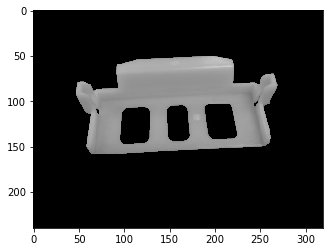

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])

In [8]:
model.predict(img_tensor)

array([[  1.43636164e-04,   1.23010240e-02,   3.57034514e-06]], dtype=float32)

In [9]:
probability = model.predict(img_tensor)[0][1] * 100
if model.predict_classes(img_tensor)[0] == 0:
    print 'It is NG!'
elif model.predict_classes(img_tensor)[0] == 1:
    print 'It is OK'
elif model.predict_classes(img_tensor)[0] == 2:
    print 'It  is COLOR'
else:
    print 'It is BARI'

1/1 [==============================] - 0s
It is OK


In [ ]:
model.evaluate_generator(validation_generator, nb_train_samples // batch_size)

In [ ]:
base_model.summary()

In [ ]:
top_model.summary()

In [ ]:
model.summary() # model = Model(input= base_model.input, output= top_model(base_model.output))

In [ ]:
for i in base_model.inputs:
    print i

In [ ]:
for i in base_model.outputs:
    print i

In [ ]:
top_model.layers

In [ ]:
base_model.layers

In [ ]:
model.layers

In [ ]:
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
model_vgg = Sequential()
model_vgg.add(ZeroPadding2D((1, 1), input_shape=(img_width, img_height,3)))
model_vgg.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

In [ ]:
model_vgg.summary()

In [36]:
len(model_vgg.layers)

31

In [37]:
x = np.ones((1, 2, 3))
x

array([[[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]]])

In [38]:
len(x)

1

In [39]:
x[0]

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [40]:
len(x[0])

2

In [41]:
y = np.transpose(x, (1, 0, 2))
y

array([[[ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.]]])

In [42]:
len(y)

2

In [43]:
import numpy as np
>>> x = np.array([[[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]]])
>>> x.ndim

3

In [44]:
print 'hungpv' == 'hungpv'

True


In [45]:
import serial
ser = serial.Serial('/dev/ttyACM0', baudrate=9600, timeout=1)

while 1:
    data = ser.readline()
    print data

SerialException: [Errno 2] could not open port /dev/ttyACM0: [Errno 2] No such file or directory: '/dev/ttyACM0'

In [ ]:
import os
path = '/home/hungpv/data8/train/3'
files = os.listdir(path)
i = 0

for file in files:
    os.rename(os.path.join(path, file), os.path.join(path, str(i)+'.jpg'))
    i = i+1

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array, load_img

input_path = 'my_photo-9983-new.jpg'
output_path = 'my_photo-9983-new-random{}.jpg'
count = 20

gen = ImageDataGenerator(
    zoom_range = 0.1,
    shear_range=0.1,
    channel_shift_range=20,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# load image to array
image = img_to_array(load_img(input_path))

# reshape to array rank 4
image = image.reshape((1,) + image.shape)

# let's create infinite flow of images
images_flow = gen.flow(image, batch_size=10)
for i, new_images in enumerate(images_flow):
    # we access only first image because of batch_size=1
    new_image = array_to_img(new_images[0], scale=True)
    new_image.save(output_path.format(i + 1))
    if i >= count:
        break